In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import multiprocessing

num_processors = multiprocessing.cpu_count()
print("Number of processors:", num_processors)

Number of processors: 2


In [ ]:
import os

cpu_info = os.popen("lscpu").read()
print(cpu_info)

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INDOOR LOCALIZATION EXPERIMENTS/data_new.csv')

In [ ]:
data.head()

,00:02:6f:af:6c:11,00:1a:2a:e8:be:35,00:30:4f:9c:79:18,00:30:f1:fe:fa:7b,00:e0:4b:c8:0c:1e,02:17:c8:83:04:1a,02:2e:ce:7b:26:7b,04:bd:88:80:7e:40,04:bd:88:83:b8:a0,04:bd:88:83:c4:e0,...,dc:ee:06:3a:ac:64,f2:d5:55:a6:2d:2b,f6:39:09:58:13:a9,f8:23:b2:b7:2a:3a,fe:01:7c:78:d3:d9,TIMESTAMPS,LAT,LON,ROOM,FLOOR
0,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
1,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
2,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
3,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
4,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2


In [ ]:
data.replace(0, -1000, inplace=True)

In [ ]:
X = data.iloc[:,:85]

In [ ]:
y = data.iloc[:,88]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
import tensorflow as tf

In [ ]:
import random

In [ ]:
random.seed(2)

In [ ]:
from joblib import Parallel, delayed

In [ ]:
knn_accuracy_list = []
knn_precision_list = []
knn_recall_list = []

randfrst_accuracy_list = []
randfrst_precision_list = []
randfrst_recall_list = []

dt_accuracy_list = []
dt_precision_list = []
dt_recall_list = []

KNN

In [ ]:
for _ in range(0,50):
  # random.seed(41)
  feature_indexes = random.sample(range(0, 85), 10)
  X = data.iloc[:,feature_indexes]
  y = data.iloc[:,88]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  classifier = KNeighborsClassifier()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  knn_accuracy = accuracy_score(y_test, y_pred)
  knn_accuracy_list.append(knn_accuracy)
  knn_precision = precision_score(y_test,y_pred,average='weighted')
  knn_precision_list.append(knn_precision)
  knn_recall = recall_score(y_test,y_pred, average='weighted')
  knn_recall_list.append(knn_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
knn_accuracy_mean = np.mean(knn_accuracy_list)
knn_accuracy_std = np.std(knn_accuracy_list)
knn_accuracy_max = np.max(knn_accuracy_list)
knn_accuracy_min = np.min(knn_accuracy_list)

knn_precision_mean = np.mean(knn_precision_list)
knn_precision_std = np.std(knn_precision_list)
knn_precision_max = np.max(knn_precision_list)
knn_precision_min = np.min(knn_precision_list)

knn_recall_mean = np.mean(knn_recall_list)
knn_recall_std = np.std(knn_recall_list)
knn_recall_max = np.max(knn_recall_list)
knn_recall_min = np.min(knn_recall_list)

In [ ]:
print(knn_accuracy_mean)
print(knn_precision_mean)
print(knn_recall_mean)

0.8808896210873146
0.8698891395829753
0.8808896210873146


In [ ]:
print(knn_accuracy_max)
print(knn_accuracy_min)
print(knn_accuracy_std)


0.9950576606260296
0.6243822075782537
0.08368784777692415


In [ ]:
print(knn_precision_max)
print(knn_precision_min)
print(knn_precision_std)

0.9953507924785547
0.592340136352144
0.09642690111603208


In [ ]:
print(knn_recall_max)
print(knn_recall_min)
print(knn_recall_std)

0.9950576606260296
0.6243822075782537
0.08368784777692415


In [ ]:
for _ in range(0,50):
  # random.seed(41)
  feature_indexes = random.sample(range(0, 85), 10)
  X = data.iloc[:,feature_indexes]
  y = data.iloc[:,88]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  rf_model = RandomForestClassifier()
  rf_model.fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  randfrst_accuracy = accuracy_score(y_test, y_pred)
  randfrst_accuracy_list.append(randfrst_accuracy)
  randfrst_precision = precision_score(y_test,y_pred,average='weighted')
  randfrst_precision_list.append(randfrst_precision)
  randfrst_recall = recall_score(y_test, y_pred, average= 'weighted')
  randfrst_recall_list.append(randfrst_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
randfrst_accuracy_mean = np.mean(randfrst_accuracy_list)
randfrst_accuracy_std = np.std(randfrst_accuracy_list)
randfrst_accuracy_max = np.max(randfrst_accuracy_list)
randfrst_accuracy_min = np.min(randfrst_accuracy_list)

randfrst_precision_mean = np.mean(randfrst_precision_list)
randfrst_precision_std = np.std(randfrst_precision_list)
randfrst_precision_max = np.max(randfrst_precision_list)
randfrst_precision_min = np.min(randfrst_precision_list)

randfrst_recall_mean = np.mean(randfrst_recall_list)
randfrst_recall_std = np.std(randfrst_recall_list)
randfrst_recall_max = np.max(randfrst_recall_list)
randfrst_recall_min = np.min(randfrst_recall_list)

In [ ]:
print(randfrst_accuracy_mean)
print(randfrst_precision_mean)
print(randfrst_recall_mean)

0.8937067545304778
0.8847525251550894
0.8937067545304778


In [ ]:
print(randfrst_accuracy_max)
print(randfrst_accuracy_min)
print(randfrst_accuracy_std)

0.9901153212520593
0.6293245469522241
0.08610850730126102


In [ ]:
print(randfrst_precision_max)
print(randfrst_precision_min)
print(randfrst_precision_std)

0.9904943300616962
0.5679789580119069
0.10015410748286775


In [ ]:
print(randfrst_recall_max)
print(randfrst_recall_min)
print(randfrst_recall_std)

0.9901153212520593
0.6293245469522241
0.08610850730126102


In [ ]:
for _ in range(0,50):
  # random.seed(41)

  feature_indexes = random.sample(range(0, 85), 10)
  X = data.iloc[:,feature_indexes]
  y = data.iloc[:,88]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  dt_model = DecisionTreeClassifier()
  dt_model.fit(X_train,y_train)
  base_pred = dt_model.predict(X_test)
  dt_accuracy = accuracy_score(y_test,base_pred)
  dt_accuracy_list.append(dt_accuracy)
  dt_precision = precision_score(y_test,base_pred,average='weighted')
  dt_precision_list.append(dt_precision)
  dt_recall = recall_score(y_test, base_pred, average= 'weighted')
  dt_recall_list.append(dt_recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
dt_accuracy_mean = np.mean(dt_accuracy_list)
dt_accuracy_std = np.std(dt_accuracy_list)
dt_accuracy_max = np.max(dt_accuracy_list)
dt_accuracy_min = np.min(dt_accuracy_list)

dt_precision_mean = np.mean(dt_precision_list)
dt_precision_std = np.std(dt_precision_list)
dt_precision_max = np.max(dt_precision_list)
dt_precision_min = np.min(dt_precision_list)

dt_recall_mean = np.mean(dt_recall_list)
dt_recall_std = np.std(dt_recall_list)
dt_recall_max = np.max(dt_recall_list)
dt_recall_min = np.min(dt_recall_list)

In [ ]:
print(dt_accuracy_mean)
print(dt_precision_mean)
print(dt_recall_mean)

0.8819110378912685
0.8674426069873161
0.8819110378912685


In [ ]:
print(dt_accuracy_max)
print(dt_accuracy_min)
print(dt_accuracy_std)

0.9884678747940692
0.6589785831960461
0.07744010589659352


In [ ]:
print(dt_precision_max)
print(dt_precision_min)
print(dt_precision_std)

0.9892435972431135
0.5972129296529156
0.09600388520461692


In [ ]:
print(dt_recall_max)
print(dt_recall_min)
print(dt_recall_std)

0.9884678747940692
0.6589785831960461
0.07744010589659352


In [ ]:
# Define a map from integer values to distance metrics
distance_metric_map = {
    0: "euclidean",
    1: "manhattan",
    2: "chebyshev"
}

# Define a map from integer values to weighting methods
weighting_method_map = {
    0: "uniform",
    1: "distance"
}

algorithm_map = {
    0: "brute",
    1: "kd_tree",
    2: "auto",
    3: "ball_tree"
}

parallel_map = {
    0: "True",
    1: "False"
}

# Define the hyperparameter space for the KNN algorithm
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
distance_metric_values = [0, 1, 2]
weighting_method_values = [0, 1]
algorithm_values = [0, 1, 2, 3]
leaf_size_values = [10, 20, 30, 40, 50]
p_values = [1, 2, 3, 4, 5]

In [ ]:
knn_accuracy_list_pso = []
knn_precision_list_pso = []
knn_recall_list_pso = []

In [ ]:
with tf.device("/gpu:0"):
  # Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    k = hyperparameters[0]
    distance_metric = round(hyperparameters[1])
    weighting_method = round(hyperparameters[2])
    algorithm = round(hyperparameters[3])
    leaf = hyperparameters[4]
    p_val = hyperparameters[5]

    # Train the KNN algorithm using the hyperparameters
    knn = KNeighborsClassifier(n_neighbors=int(k), metric=distance_metric_map[distance_metric],
                               weights=weighting_method_map[weighting_method],
                               algorithm=algorithm_map[algorithm],
                               leaf_size = int(leaf), p = int(p_val))
    knn.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Set the number of parallel jobs
  num_jobs = -1  # Set it to the number of available CPUs or GPUs for maximum parallelism

  # Initialize the population of particles
  num_particles = 50
  population = []
  # random.seed(41)
  for i in range(num_particles):
    hyperparameters = [np.random.choice(k_values), np.random.choice(distance_metric_values),
                       np.random.choice(weighting_method_values),
                       np.random.choice(algorithm_values),
                       np.random.choice(leaf_size_values),
                       np.random.choice(p_values)]
    population.append(hyperparameters)

  # Set the number of iterations for the PSO algorithm
  num_iterations = 100

  # Set the acceleration constants for the PSO algorithm
  c1 = 2
  c2 = 2

  # Set the initial velocity and position of each particle
  velocity = [[0, 0, 0, 0, 0, 0] for i in range(num_particles)]
  best_position = population.copy()

  # Set the initial global best position
  global_best_fitness = -float("inf")
  global_best_position = []

  # Iterate through the PSO algorithm loop
  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(particle) for particle in population
    )

    # Update the best position of each particle
    for j, particle in enumerate(population):
      if fitness[j] > evaluate_fitness(best_position[j]):
        best_position[j] = particle
    # Update the global best position
    if max(fitness) > global_best_fitness:
      global_best_fitness = max(fitness)
      global_best_position = population[fitness.index(max(fitness))]

    # Update the velocity and position of each particle
    for j, particle in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      velocity[j] = [velocity[j][0] + c1*r1*(best_position[j][0] - particle[0])
                      + c2*r2*(global_best_position[0] - particle[0]),
              velocity[j][1] + c1*r1*(best_position[j][1] - particle[1])
               + c2*r2*(global_best_position[1] - particle[1]),
              velocity[j][2] + c1*r1*(best_position[j][2] - particle[2])
               + c2*r2*(global_best_position[2] - particle[2]),
              velocity[j][3] + c1*r1*(best_position[j][3] - particle[3])
               + c2*r2*(global_best_position[3] - particle[3]),
              velocity[j][4] + c1*r1*(best_position[j][4] - particle[4])
               + c2*r2*(global_best_position[4] - particle[4]),
              velocity[j][5] + c1*r1*(best_position[j][5] - particle[5])
               + c2*r2*(global_best_position[5] - particle[5])]

      particle[0] = particle[0] + velocity[j][0]
      particle[1] = particle[1] + velocity[j][1]
      particle[2] = particle[2] + velocity[j][2]
      particle[3] = particle[3] + velocity[j][3]
      particle[4] = particle[4] + velocity[j][4]
      particle[5] = particle[5] + velocity[j][5]


      # Check if the new position is within the bounds of the hyperparameter space
      if particle[0] < k_values[0]:
        particle[0] = k_values[0]
      elif particle[0] > k_values[-1]:
        particle[0] = k_values[-1]

      if particle[1] < distance_metric_values[0]:
        particle[1] = distance_metric_values[0]
      elif particle[1] > distance_metric_values[-1]:
        particle[1] = distance_metric_values[-1]

      if particle[2] < weighting_method_values[0]:
        particle[2] = weighting_method_values[0]
      elif particle[2] > weighting_method_values[-1]:
        particle[2] = weighting_method_values[-1]

      if particle[3] < algorithm_values[0]:
        particle[3] = algorithm_values[0]
      elif particle[3] > algorithm_values[-1]:
        particle[3] = algorithm_values[-1]

      if particle[4] < leaf_size_values[0]:
        particle[4] = leaf_size_values[0]
      elif particle[4] > leaf_size_values[-1]:
        particle[4] = leaf_size_values[-1]

      if particle[5] < p_values[0]:
        particle[5] = p_values[0]
      elif particle[5] > p_values[-1]:
        particle[5] = p_values[-1]

  for _ in range(0,50):
    # random.seed(41)
    feature_indexes = random.sample(range(0,85), 10)
    X = data.iloc[:,feature_indexes]
    y = data.iloc[:,88]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors=int(global_best_position[0]),
                             metric = distance_metric_map[global_best_position[1]],
                              weights=weighting_method_map[global_best_position[2]],
                             algorithm=algorithm_map[global_best_position[3]],
                               leaf_size = int(global_best_position[4]),
                               p = int(global_best_position[5]))

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy_pso = accuracy_score(y_test, y_pred)
    knn_accuracy_list_pso.append(knn_accuracy_pso)
    knn_precision_pso = precision_score(y_test,y_pred,average='weighted')
    knn_precision_list_pso.append(knn_precision_pso)
    knn_recall_pso = recall_score(y_test,y_pred, average='weighted')
    knn_recall_list_pso.append(knn_recall_pso)

  print(f"Optimal hyperparameters: k={global_best_position[0]}, distance_metric={distance_metric_map[global_best_position[1]]}, weighting method={weighting_method_map[global_best_position[2]]}, algorithm={algorithm_map[global_best_position[3]]}, leaf_size={global_best_position[4]},p={global_best_position[5]} ")




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: k=2.0, distance_metric=euclidean, weighting method=uniform, algorithm=brute, leaf_size=40.0,p=1.0 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_accuracy_mean_pso = np.mean(knn_accuracy_list_pso)
knn_accuracy_std_pso = np.std(knn_accuracy_list_pso)
knn_accuracy_max_pso = np.max(knn_accuracy_list_pso)
knn_accuracy_min_pso = np.min(knn_accuracy_list_pso)

knn_precision_mean_pso = np.mean(knn_precision_list_pso)
knn_precision_std_pso = np.std(knn_precision_list_pso)
knn_precision_max_pso = np.max(knn_precision_list_pso)
knn_precision_min_pso = np.min(knn_precision_list_pso)

knn_recall_mean_pso = np.mean(knn_recall_list_pso)
knn_recall_std_pso = np.std(knn_recall_list_pso)
knn_recall_max_pso = np.max(knn_recall_list_pso)
knn_recall_min_pso = np.min(knn_recall_list_pso)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(knn_accuracy_mean_pso)
print(knn_precision_mean_pso)
print(knn_recall_mean_pso)

0.882998352553542
0.8753895003420133
0.882998352553542


In [ ]:
print(knn_accuracy_max_pso)
print(knn_accuracy_min_pso)
print(knn_accuracy_std_pso)

0.9950576606260296
0.6820428336079077
0.08552610986968143


In [ ]:
print(knn_precision_max_pso)
print(knn_precision_min_pso)
print(knn_precision_std_pso)

0.9952307618842967
0.6590695679460812
0.09712710932270373


In [ ]:
print(knn_recall_max_pso)
print(knn_recall_min_pso)
print(knn_recall_std_pso)

0.9950576606260296
0.6820428336079077
0.08552610986968143


RANDOM FOREST

In [ ]:
randfrst_accuracy_list_pso = []
randfrst_precision_list_pso = []
randfrst_recall_list_pso = []

In [ ]:
# Define a map from integer values to criterion options
criterion_map = {
     0: "gini",
     1: "entropy",
     2: "log_loss"
 }

# # Define a map from integer values to feature importance calculation methods
min_samples_split_map = {
     0: 2,
     1: 5,
     2: 10
 }

max_features_map = {
    0: "sqrt",
    1: "log2"
}

# # Define the hyperparameter space for the Random Forest algorithm
n_estimators_values = [10, 50, 100, 200, 500]
max_depth_values = [5, 10, 20]
criterion_values = [0, 1, 2]
min_samples_split_values = [0, 1, 2]
min_samples_leaf_values = [1, 2, 3, 4, 5]
max_features_values = [0, 1]


In [ ]:
with tf.device("/gpu:0"):
  # Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    n_estim = hyperparameters[0]
    maxdepth = round(hyperparameters[1])
    criterion_val = round(hyperparameters[2])
    min_ssv = round(hyperparameters[3])
    min_sl = hyperparameters[4]
    max_fv = round(hyperparameters[5])

    # Train the KNN algorithm using the hyperparameters
    rf = RandomForestClassifier(n_estimators=int(n_estim), max_depth=int(maxdepth),
                               criterion=criterion_map[criterion_val],
                               min_samples_split=min_samples_split_map[min_ssv],
                                min_samples_leaf=int(min_sl),
                                max_features=max_features_map[max_fv]
                                )
    rf.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Initialize the population of particles
  num_jobs = -1  # Set it to the number of available CPUs or GPUs for maximum parallelism

  num_particles = 50
  population = []
  for i in range(num_particles):
    # random.seed(41)
    hyperparameters = [np.random.choice(n_estimators_values), np.random.choice(max_depth_values),
                       np.random.choice(criterion_values),
                       np.random.choice(min_samples_split_values),
                       np.random.choice(min_samples_leaf_values),
                       np.random.choice(max_features_values)
                       ]
    population.append(hyperparameters)

  # Set the number of iterations for the PSO algorithm
  num_iterations = 100

  # Set the acceleration constants for the PSO algorithm
  c1 = 2
  c2 = 2

  # Set the initial velocity and position of each particle
  velocity = [[0, 0, 0, 0, 0, 0] for i in range(num_particles)]
  best_position = population.copy()

  # Set the initial global best position
  global_best_fitness = -float("inf")
  global_best_position = []

  # Iterate through the PSO algorithm loop
  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(particle) for particle in population
    )
    # Update the best position of each particle
    for j, particle in enumerate(population):
      if fitness[j] > evaluate_fitness(best_position[j]):
        best_position[j] = particle
    # Update the global best position
    if max(fitness) > global_best_fitness:
      global_best_fitness = max(fitness)
      global_best_position = population[fitness.index(max(fitness))]

    # Update the velocity and position of each particle
    for j, particle in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      velocity[j] = [velocity[j][0] + c1*r1*(best_position[j][0] - particle[0])
                      + c2*r2*(global_best_position[0] - particle[0]),

              velocity[j][1] + c1*r1*(best_position[j][1] - particle[1])
               + c2*r2*(global_best_position[1] - particle[1]),

              velocity[j][2] + c1*r1*(best_position[j][2] - particle[2])
               + c2*r2*(global_best_position[2] - particle[2]),

              velocity[j][3] + c1*r1*(best_position[j][3] - particle[3])
               + c2*r2*(global_best_position[3] - particle[3]),

              velocity[j][4] + c1*r1*(best_position[j][4] - particle[4])
               + c2*r2*(global_best_position[4] - particle[4]),

              velocity[j][5] + c1*r1*(best_position[j][5] - particle[5])
               + c2*r2*(global_best_position[5] - particle[5])
                     ]

      particle[0] = particle[0] + velocity[j][0]
      particle[1] = particle[1] + velocity[j][1]
      particle[2] = particle[2] + velocity[j][2]
      particle[3] = particle[3] + velocity[j][3]
      particle[4] = particle[4] + velocity[j][4]
      particle[5] = particle[5] + velocity[j][5]


      # Check if the new position is within the bounds of the hyperparameter space
      if particle[0] < n_estimators_values[0]:
        particle[0] = n_estimators_values[0]
      elif particle[0] > n_estimators_values[-1]:
        particle[0] = n_estimators_values[-1]

      if particle[1] < max_depth_values[0]:
        particle[1] = max_depth_values[0]
      elif particle[1] > max_depth_values[-1]:
        particle[1] = max_depth_values[-1]

      if particle[2] < criterion_values[0]:
        particle[2] = criterion_values[0]
      elif particle[2] > criterion_values[-1]:
        particle[2] = criterion_values[-1]

      if particle[3] < min_samples_split_values[0]:
        particle[3] = min_samples_split_values[0]
      elif particle[3] > min_samples_split_values[-1]:
        particle[3] = min_samples_split_values[-1]

      if particle[4] < min_samples_leaf_values[0]:
        particle[4] = min_samples_leaf_values[0]
      elif particle[4] > min_samples_leaf_values[-1]:
        particle[4] = min_samples_leaf_values[-1]

      if particle[5] < max_features_values[0]:
        particle[5] = max_features_values[0]
      elif particle[5] > max_features_values[-1]:
        particle[5] = max_features_values[-1]

  for _ in range(0,50):
    # random.seed(41)

    feature_indexes = random.sample(range(0,85), 10)
    X = data.iloc[:,feature_indexes]
    y = data.iloc[:,88]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    rf = RandomForestClassifier(n_estimators=int(global_best_position[0]),
                                max_depth = int(global_best_position[1]),
                                criterion=criterion_map[global_best_position[2]],
                                min_samples_split=min_samples_split_map[global_best_position[3]],
                                min_samples_leaf=int(global_best_position[4]),
                                max_features=max_features_map[global_best_position[5]])

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred)
    randfrst_accuracy_list_pso.append(rf_accuracy)
    rf_precision = precision_score(y_test,y_pred,average='weighted')
    randfrst_precision_list_pso.append(rf_precision)
    rf_recall = recall_score(y_test,y_pred, average='weighted')
    randfrst_recall_list_pso.append(rf_recall)

  print(f"Optimal hyperparameters: n_estimators={global_best_position[0]}, max_depth={global_best_position[1]}, criterion={criterion_map[global_best_position[2]]}, min_samples_split={min_samples_split_map[global_best_position[3]]},min_samples_leaf={global_best_position[4]},max_features={max_features_map[global_best_position[5]]}")




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: n_estimators=10, max_depth=20, criterion=gini, min_samples_split=2,min_samples_leaf=5,max_features=sqrt


In [ ]:
randfrst_accuracy_mean_pso = np.mean(randfrst_accuracy_list_pso)
randfrst_accuracy_std_pso = np.std(randfrst_accuracy_list_pso)
randfrst_accuracy_max_pso = np.max(randfrst_accuracy_list_pso)
randfrst_accuracy_min_pso = np.min(randfrst_accuracy_list_pso)

randfrst_precision_mean_pso = np.mean(randfrst_precision_list_pso)
randfrst_precision_std_pso = np.std(randfrst_precision_list_pso)
randfrst_precision_max_pso = np.max(randfrst_precision_list_pso)
randfrst_precision_min_pso = np.min(randfrst_precision_list_pso)

randfrst_recall_mean_pso = np.mean(randfrst_recall_list_pso)
randfrst_recall_std_pso = np.std(randfrst_recall_list_pso)
randfrst_recall_max_pso = np.max(randfrst_recall_list_pso)
randfrst_recall_min_pso = np.min(randfrst_recall_list_pso)

In [ ]:
print(randfrst_accuracy_mean_pso)
print(randfrst_precision_mean_pso)
print(randfrst_recall_mean_pso)

0.9130807248764414
0.9074517468582165
0.9130807248764414


In [ ]:
print(randfrst_accuracy_max_pso)
print(randfrst_accuracy_min_pso)
print(randfrst_accuracy_std_pso)

0.9835255354200988
0.6359143327841845
0.07130802955445488


In [ ]:
print(randfrst_precision_max_pso)
print(randfrst_precision_min_pso)
print(randfrst_precision_std_pso)

0.9839221353640987
0.5473174514668956
0.08379959634150258


In [ ]:
print(randfrst_recall_max_pso)
print(randfrst_recall_min_pso)
print(randfrst_recall_std_pso)

0.9835255354200988
0.6359143327841845
0.07130802955445488


DECISION TREES

In [ ]:
dt_accuracy_list_pso = []
dt_precision_list_pso = []
dt_recall_list_pso = []

In [ ]:
# Define a map from integer values to criterion options
criterion_map = {
     0: "gini",
     1: "entropy",
     2: "log_loss"
 }

splitter_map = {
    0: "best",
    1: "random"
}
# # Define a map from integer values to feature importance calculation methods
min_samples_split_map = {
     0: 2,
     1: 5,
     2: 10
 }

max_features_map = {
    0: "sqrt",
    1: "log2"
}
# # Define the hyperparameter space for the Random Forest algorithm
splitter_values = [0, 1]
max_depth_values = [5, 10, 20]
criterion_values = [0, 1, 2]
min_samples_split_values = [0, 1, 2]
min_samples_leaf_values = [1, 2, 3, 4, 5]
max_features_values = [0, 1]

In [ ]:
with tf.device("/gpu:0"):
  # Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    splitter_val = round(hyperparameters[0])
    maxdepth = hyperparameters[1]
    criterion_val = round(hyperparameters[2])
    min_ssv = round(hyperparameters[3])
    min_slv = hyperparameters[4]
    max_fv = round(hyperparameters[5])
    # Train the KNN algorithm using the hyperparameters
    dt = DecisionTreeClassifier(splitter=splitter_map[splitter_val], max_depth=int(maxdepth),
                               criterion=criterion_map[criterion_val],
                               min_samples_split=min_samples_split_map[min_ssv],
                                min_samples_leaf=int(min_slv),
                                max_features=max_features_map[max_fv])
    dt.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = dt.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Initialize the population of particles
  # burada kaldım.
  num_jobs = -1
  num_particles = 50
  population = []
  # random.seed(41)
  for i in range(num_particles):
    hyperparameters = [np.random.choice(splitter_values), np.random.choice(max_depth_values),
                       np.random.choice(criterion_values),
                       np.random.choice(min_samples_split_values),
                       np.random.choice(min_samples_leaf_values),
                       np.random.choice(max_features_values)]
    population.append(hyperparameters)

  # Set the number of iterations for the PSO algorithm
  num_iterations = 100

  # Set the acceleration constants for the PSO algorithm
  c1 = 2
  c2 = 2

  # Set the initial velocity and position of each particle
  velocity = [[0, 0, 0, 0, 0, 0] for i in range(num_particles)]
  best_position = population.copy()

  # Set the initial global best position
  global_best_fitness = -float("inf")
  global_best_position = []

  # Iterate through the PSO algorithm loop
  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(particle) for particle in population
    )
    # Update the best position of each particle
    for j, particle in enumerate(population):
      if fitness[j] > evaluate_fitness(best_position[j]):
        best_position[j] = particle
    # Update the global best position
    if max(fitness) > global_best_fitness:
      global_best_fitness = max(fitness)
      global_best_position = population[fitness.index(max(fitness))]

    # Update the velocity and position of each particle
    for j, particle in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      velocity[j] = [velocity[j][0] + c1*r1*(best_position[j][0] - particle[0])
                      + c2*r2*(global_best_position[0] - particle[0]),

              velocity[j][1] + c1*r1*(best_position[j][1] - particle[1])
               + c2*r2*(global_best_position[1] - particle[1]),

              velocity[j][2] + c1*r1*(best_position[j][2] - particle[2])
               + c2*r2*(global_best_position[2] - particle[2]),

              velocity[j][3] + c1*r1*(best_position[j][3] - particle[3])
               + c2*r2*(global_best_position[3] - particle[3]),

              velocity[j][4] + c1*r1*(best_position[j][4] - particle[4])
               + c2*r2*(global_best_position[4] - particle[4]),

              velocity[j][5] + c1*r1*(best_position[j][5] - particle[5])
               + c2*r2*(global_best_position[5] - particle[5])]

      particle[0] = particle[0] + velocity[j][0]
      particle[1] = particle[1] + velocity[j][1]
      particle[2] = particle[2] + velocity[j][2]
      particle[3] = particle[3] + velocity[j][3]
      particle[4] = particle[4] + velocity[j][4]
      particle[5] = particle[5] + velocity[j][5]

      # Check if the new position is within the bounds of the hyperparameter space
      if particle[0] < splitter_values[0]:
        particle[0] = splitter_values[0]
      elif particle[0] > splitter_values[-1]:
        particle[0] = splitter_values[-1]

      if particle[1] < max_depth_values[0]:
        particle[1] = max_depth_values[0]
      elif particle[1] > max_depth_values[-1]:
        particle[1] = max_depth_values[-1]

      if particle[2] < criterion_values[0]:
        particle[2] = criterion_values[0]
      elif particle[2] > criterion_values[-1]:
        particle[2] = criterion_values[-1]

      if particle[3] < min_samples_split_values[0]:
        particle[3] = min_samples_split_values[0]
      elif particle[3] > min_samples_split_values[-1]:
        particle[3] = min_samples_split_values[-1]

      if particle[4] < min_samples_leaf_values[0]:
        particle[4] = min_samples_leaf_values[0]
      elif particle[4] > min_samples_leaf_values[-1]:
        particle[4] = min_samples_leaf_values[-1]

      if particle[5] < max_features_values[0]:
        particle[5] = max_features_values[0]
      elif particle[5] > max_features_values[-1]:
        particle[5] = max_features_values[-1]

  for _ in range(0,50):
    # random.seed(41)

    feature_indexes = random.sample(range(0,85), 10)
    X = data.iloc[:,feature_indexes]
    y = data.iloc[:,88]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    dt = DecisionTreeClassifier(splitter=splitter_map[global_best_position[0]],
                             max_depth = int(global_best_position[1]),
                              criterion=criterion_map[global_best_position[2]],
                             min_samples_split=min_samples_split_map[global_best_position[3]],
                              min_samples_leaf = int(global_best_position[4]),
                                max_features=max_features_map[global_best_position[5]])

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_accuracy_list_pso.append(dt_accuracy)
    dt_precision = precision_score(y_test,y_pred,average='weighted')
    dt_precision_list_pso.append(dt_precision)
    dt_recall = recall_score(y_test,y_pred, average='weighted')
    dt_recall_list_pso.append(dt_recall)

  print(f"Optimal hyperparameters: splitter={global_best_position[0]}, max_depth={global_best_position[1]}, criterion={criterion_map[global_best_position[2]]}, min_samples_split={min_samples_split_map[global_best_position[3]]}, min_samples_leaf = {global_best_position[4]}, max_features = {max_features_map[global_best_position[5]]}")




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: splitter=0, max_depth=20, criterion=log_loss, min_samples_split=2, min_samples_leaf = 1, max_features = sqrt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt_accuracy_mean_pso = np.mean(dt_accuracy_list_pso)
dt_accuracy_std_pso = np.std(dt_accuracy_list_pso)
dt_accuracy_max_pso = np.max(dt_accuracy_list_pso)
dt_accuracy_min_pso = np.min(dt_accuracy_list_pso)

dt_precision_mean_pso = np.mean(dt_precision_list_pso)
dt_precision_std_pso = np.std(dt_precision_list_pso)
dt_precision_max_pso = np.max(dt_precision_list_pso)
dt_precision_min_pso = np.min(dt_precision_list_pso)

dt_recall_mean_pso = np.mean(dt_recall_list_pso)
dt_recall_std_pso = np.std(dt_recall_list_pso)
dt_recall_max_pso = np.max(dt_recall_list_pso)
dt_recall_min_pso = np.min(dt_recall_list_pso)

In [ ]:
print(dt_accuracy_mean_pso)
print(dt_precision_mean_pso)
print(dt_recall_mean_pso)

0.8863920922570016
0.874961672686918
0.8863920922570016


In [ ]:
print(dt_accuracy_max_pso)
print(dt_accuracy_min_pso)
print(dt_accuracy_std_pso)

0.9950576606260296
0.5354200988467874
0.09184714797488902


In [ ]:
print(dt_precision_max_pso)
print(dt_precision_min_pso)
print(dt_precision_std_pso)

0.9955210049423394
0.46779358520461184
0.10453932927456852


In [ ]:
print(dt_recall_max_pso)
print(dt_recall_min_pso)
print(dt_recall_std_pso)

0.9950576606260296
0.5354200988467874
0.09184714797488902


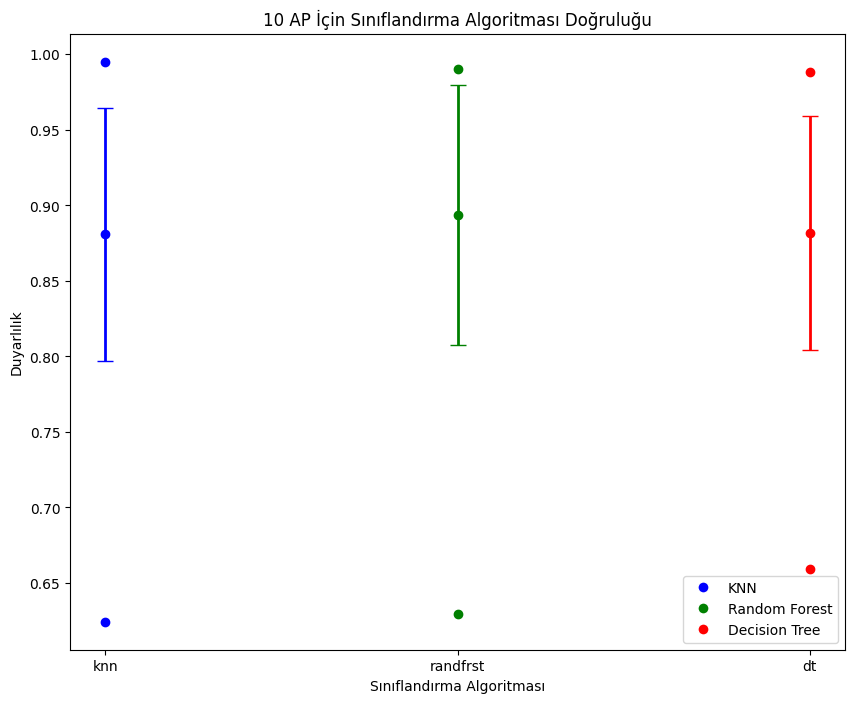

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# KNN
ax.errorbar('knn', knn_accuracy_mean, knn_recall_std, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_accuracy_max, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_accuracy_min, fmt='o', linewidth=2, capsize=6, color='blue')

# Random Forest
ax.errorbar('randfrst', randfrst_accuracy_mean, randfrst_accuracy_std, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_max, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_min, fmt='o', linewidth=2, capsize=6, color='green')

# Decision Tree
ax.errorbar('dt', dt_accuracy_mean, dt_accuracy_std, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_max, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_min, fmt='o', linewidth=2, capsize=6, color='red')

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Duyarlılık')
ax.set_title('10 AP İçin Sınıflandırma Algoritması Doğruluğu')
# Custom legend labels and colors
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

plt.show()

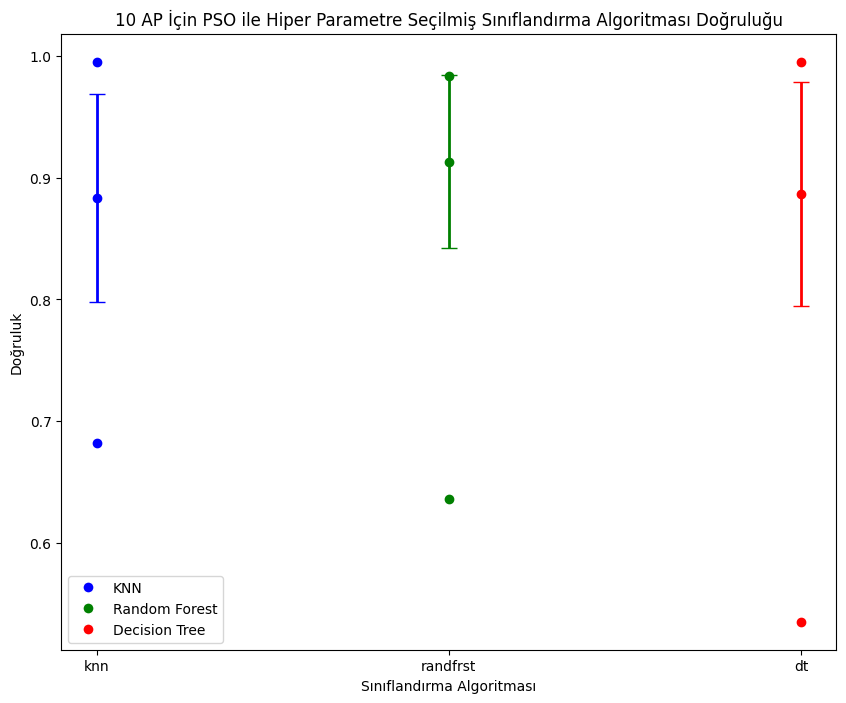

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_accuracy_mean_pso, knn_accuracy_std_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_accuracy_max_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_accuracy_min_pso, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_accuracy_mean_pso, randfrst_accuracy_std_pso, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_max_pso, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_min_pso, fmt='o', linewidth=2, capsize=6, color='green')

ax.errorbar('dt', dt_accuracy_mean_pso, dt_accuracy_std_pso, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_max_pso, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_min_pso, fmt='o', linewidth=2, capsize=6, color='red')

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Doğruluk')
ax.set_title('10 AP İçin PSO ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Doğruluğu')

knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

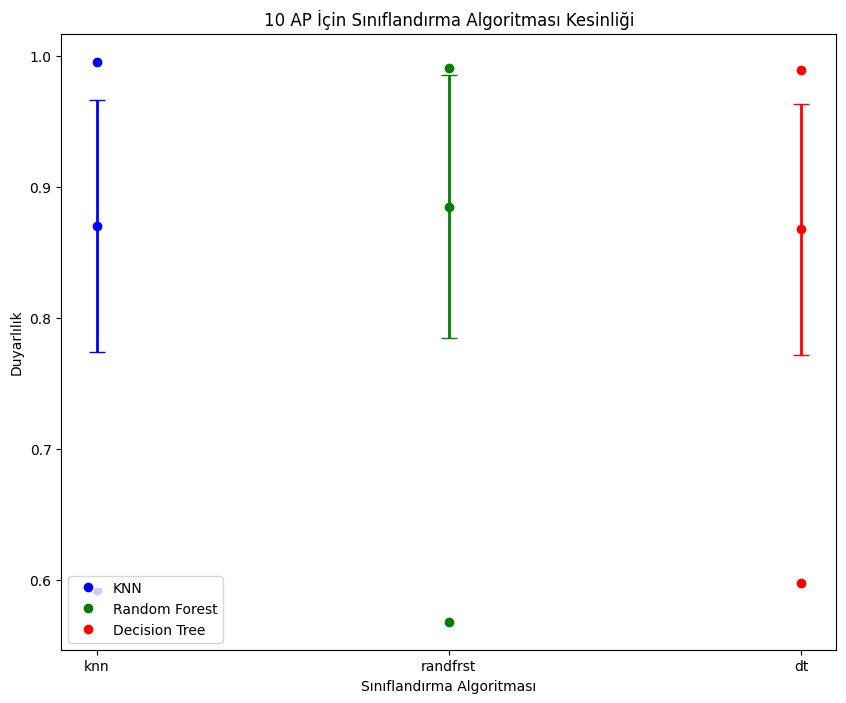

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# KNN
ax.errorbar('knn', knn_precision_mean, knn_precision_std, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_precision_max, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_precision_min, fmt='o', linewidth=2, capsize=6, color='blue')

# Random Forest
ax.errorbar('randfrst', randfrst_precision_mean, randfrst_precision_std, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_precision_max, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_precision_min, fmt='o', linewidth=2, capsize=6, color='green')

# Decision Tree
ax.errorbar('dt', dt_precision_mean, dt_precision_std, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_precision_max, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_precision_min, fmt='o', linewidth=2, capsize=6, color='red')

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Duyarlılık')
ax.set_title('10 AP İçin Sınıflandırma Algoritması Kesinliği')
# Custom legend labels and colors
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

plt.show()

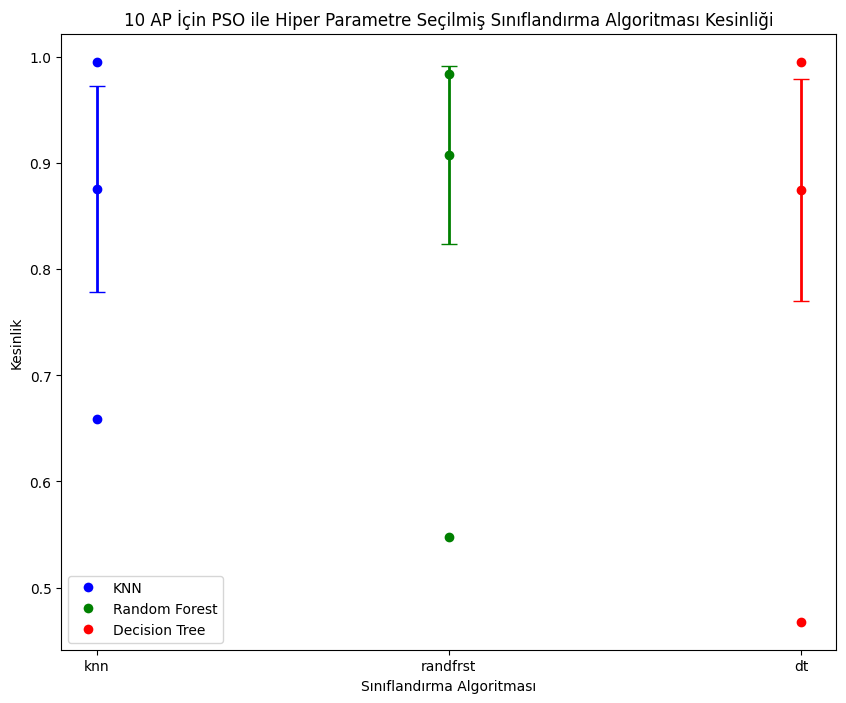

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_precision_mean_pso, knn_precision_std_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_precision_max_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_precision_min_pso, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_precision_mean_pso, randfrst_precision_std_pso, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_precision_max_pso, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_precision_min_pso, fmt='o', linewidth=2, capsize=6, color="green")


ax.errorbar('dt', dt_precision_mean_pso, dt_precision_std_pso, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_precision_max_pso, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_precision_min_pso, fmt='o', linewidth=2, capsize=6, color="red")

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Kesinlik')
ax.set_title('10 AP İçin PSO ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Kesinliği')
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

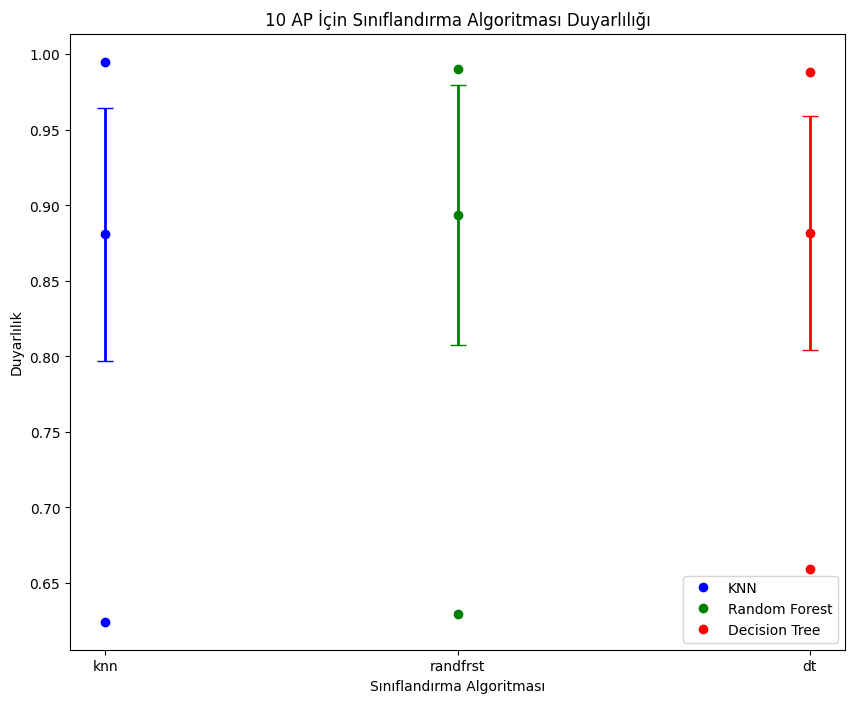

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# KNN
ax.errorbar('knn', knn_recall_mean, knn_recall_std, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_recall_max, fmt='o', linewidth=2, capsize=6, color='blue')
ax.errorbar('knn', knn_recall_min, fmt='o', linewidth=2, capsize=6, color='blue')

# Random Forest
ax.errorbar('randfrst', randfrst_recall_mean, randfrst_recall_std, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_recall_max, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_recall_min, fmt='o', linewidth=2, capsize=6, color='green')

# Decision Tree
ax.errorbar('dt', dt_recall_mean, dt_recall_std, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_recall_max, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_recall_min, fmt='o', linewidth=2, capsize=6, color='red')

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Duyarlılık')
ax.set_title('10 AP İçin Sınıflandırma Algoritması Duyarlılığı')
# Custom legend labels and colors
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

plt.show()

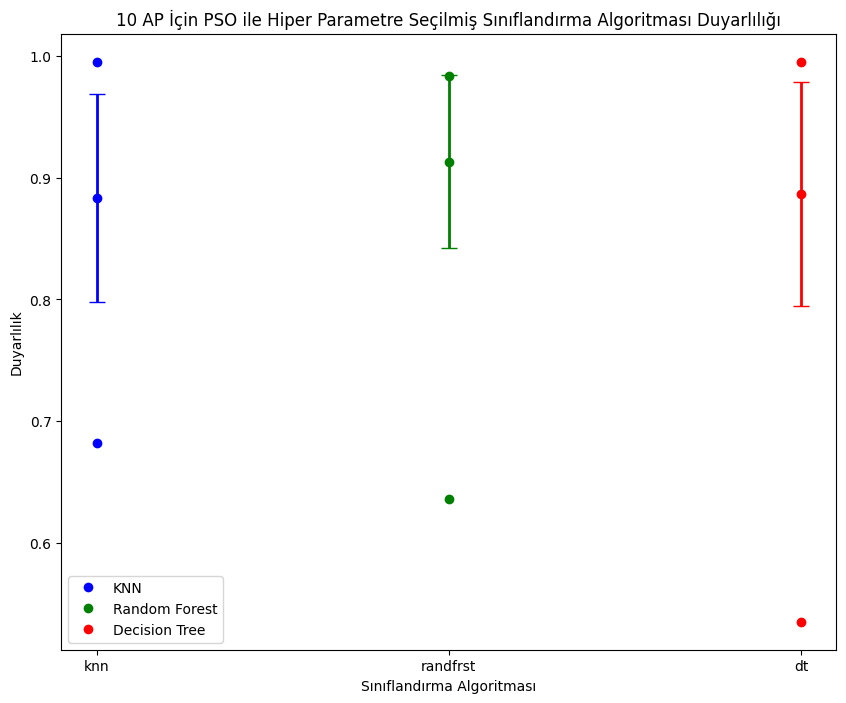

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_recall_mean_pso, knn_recall_std_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_recall_max_pso, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_recall_min_pso, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_recall_mean_pso, randfrst_recall_std_pso, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_recall_max_pso, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_recall_min_pso, fmt='o', linewidth=2, capsize=6, color="green")

ax.errorbar('dt', dt_recall_mean_pso, dt_recall_std_pso, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_recall_max_pso, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_recall_min_pso, fmt='o', linewidth=2, capsize=6, color="red")

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Duyarlılık')
ax.set_title('10 AP İçin PSO ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Duyarlılığı')
# Custom legend labels and colors
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

plt.show()